# Project:
### in this project, we predict to see how many people have set up a default payment or not in their credit card payment.

In [70]:
import numpy as np  # for data manipulation
import pandas as pd  # load and manipulate the data
import matplotlib.pyplot as plt # for drawing graphs
import matplotlib.colors as colors

from sklearn.utils import resample  # downsample the data set
from sklearn.model_selection import train_test_split # this split the data into training and testing data
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC  # This will make a Support vector Machine for classification
from sklearn.model_selection import GridSearchCV  # This will do cross-validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # This will creates a metrix
from sklearn.decomposition import PCA  # Perform PCA to plot the data
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap



## Preprocessing

In [71]:
# this will import and read the data
df = pd.read_csv('UCI_Credit_Card.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [73]:
df.shape

(30000, 25)

In [74]:

df.head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## Data Cleaning

In [75]:
# this rename the column 'default.payment.next.month' to 'DEFAULT'
df.rename(columns={'default.payment.next.month': 'DEFAULT'}, inplace=True)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [76]:
# This drop the column ID and modify the data frame
df.drop('ID', axis=1, inplace=True)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [77]:
# this check the datatype of each column
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [78]:
# this check to see if there is any missing value in the dataset and returns the first 5 values.
df.isna().head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# this count the number of NA values by column and then sort them
df.isna().sum().sort_values()

LIMIT_BAL    0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
BILL_AMT4    0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_6        0
PAY_5        0
PAY_4        0
PAY_3        0
PAY_2        0
PAY_0        0
AGE          0
MARRIAGE     0
EDUCATION    0
SEX          0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [80]:
# this count the number of all NA values in the data frame.
df.isna().sum().sum()

0

In [81]:
# this return the number of zeros in each column
(df == 0).sum()

LIMIT_BAL        0
SEX              0
EDUCATION       14
MARRIAGE        54
AGE              0
PAY_0        14737
PAY_2        15730
PAY_3        15764
PAY_4        16455
PAY_5        16947
PAY_6        16286
BILL_AMT1     2008
BILL_AMT2     2506
BILL_AMT3     2870
BILL_AMT4     3195
BILL_AMT5     3506
BILL_AMT6     4020
PAY_AMT1      5249
PAY_AMT2      5396
PAY_AMT3      5968
PAY_AMT4      6408
PAY_AMT5      6703
PAY_AMT6      7173
DEFAULT      23364
dtype: int64

## Because there are no missing data, we'ren't going to change it.

### However, we saw that there are some columns with zeros in it

In [86]:
# this check to see what are the unique values in the 'sex' colunm
np.sort(df['SEX'].unique())

array([1, 2])

In [87]:
# this check to see what are the unique values in the 'Education' column
np.sort(df['EDUCATION'].unique())

array([0, 1, 2, 3, 4, 5, 6])

In [88]:
# this check to see what are the unique values in the 'Marriage' column
np.sort(df['MARRIAGE'].unique())

array([0, 1, 2, 3])

## Missing Data Part 2: Dealing With Missing Data


##

In [91]:
# this check to see how many rows in the Education and Marriage column and then return it

len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [92]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [93]:
# this check the total number of rows in the data set

len(df)

30000

In [94]:
# This save all the rows in 'Education' and 'marriage' that does not contain zeros values
no_missing_val = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

no_missing_val

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [95]:
## This is just a remainder to check the number of rows
len(no_missing_val)

29932

In [66]:
## This show us the unique value in the Education column and then sort the result

np.sort(no_missing_val['EDUCATION'].unique())

array([1, 2, 3, 4, 5, 6])

In [67]:
## This show us the unique value in the marriage column then sort the result

np.sort(no_missing_val['MARRIAGE'].unique())

array([1, 2, 3])

##

In [97]:
# Just to remind us the number of rows in the data set
len(no_missing_val)

29932

# Because SVM perform well with small data set. Then 
## Let's downsample the data to easily work with it.

###

In [69]:
# This return all the rows where people have default it their payment and where people who did not default it.
# And save them in a new variables

df_no_default = no_missing_val[no_missing_val['DEFAULT'] == 0]

df_default = no_missing_val[no_missing_val['DEFAULT'] == 1]

### This downsample the defaulted dataset to 1000 

In [98]:
# Becaude SVM works better with small sample. let's creates a sample of 1000 rows for people who did not defaulted

df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)

len(df_no_default_downsampled)

1000

### This downsample the not defaulted dataset to 1000 

In [99]:
# this creates a sample of 1000 rows for people who default it
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)

len(df_default_downsampled)

1000

In [100]:
# This merge the 2 samples to one single sample
df_downsample = pd.concat([df_default_downsampled, df_no_default_downsampled])

In [101]:
len(df_downsample)

2000

## Format Data Part I: Split Data into Dependent and Independent Variables

# 

In [104]:
# This removes the 'Default' column from the dataset and save it to a new variable 'X' as the predictors variables

X = df_downsample.drop('DEFAULT', axis=1) 

In [31]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000.0,2,1,1,47,3,2,2,2,2,...,5000.0,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0
19350,80000.0,2,2,2,36,2,0,0,-2,-2,...,0.0,0.0,0.0,0.0,1700.0,0.0,0.0,0.0,0.0,0.0
17057,30000.0,2,3,2,22,2,2,0,0,0,...,29047.0,29507.0,11609.0,11711.0,0.0,1687.0,1147.0,524.0,400.0,666.0
26996,80000.0,1,1,2,34,2,2,2,2,2,...,63827.0,64682.0,65614.0,67007.0,2800.0,3000.0,2500.0,2600.0,2600.0,2600.0
23621,210000.0,2,3,1,44,-2,-2,-2,-2,-2,...,17706.0,0.0,5646.0,14793.0,13462.0,17706.0,0.0,5646.0,14793.0,7376.0


In [32]:
X.shape

(2000, 23)

In [105]:
# This is the target variable
y = df_downsample['DEFAULT']

In [34]:
y.head()

19982    1
19350    1
17057    1
26996    1
23621    1
Name: DEFAULT, dtype: int64

In [35]:
y.shape

(2000,)

## Format the Data part 2: One hot Encoding

In [113]:
## this is just to check what get_dummies does when we don't save the result 
## in a variables.(it gives us 3 variables of the same name)

pd.get_dummies(X, columns =['MARRIAGE'])

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
19982,300000.0,2,1,47,3,2,2,2,2,2,...,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
19350,80000.0,2,2,36,2,0,0,-2,-2,-2,...,0.0,1700.0,0.0,0.0,0.0,0.0,0.0,False,True,False
17057,30000.0,2,3,22,2,2,0,0,0,0,...,11711.0,0.0,1687.0,1147.0,524.0,400.0,666.0,False,True,False
26996,80000.0,1,1,34,2,2,2,2,2,2,...,67007.0,2800.0,3000.0,2500.0,2600.0,2600.0,2600.0,False,True,False
23621,210000.0,2,3,44,-2,-2,-2,-2,-2,-2,...,14793.0,13462.0,17706.0,0.0,5646.0,14793.0,7376.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18942,150000.0,2,1,31,-1,-1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
29836,180000.0,1,6,34,-2,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
19424,90000.0,2,1,33,-1,-1,-1,-1,-1,-1,...,3000.0,6000.0,0.0,3000.0,3000.0,3000.0,3000.0,False,True,False
25593,120000.0,2,3,38,0,0,0,0,0,0,...,120682.0,5720.0,5820.0,5670.0,4250.0,4450.0,4470.0,True,False,False


In [111]:
# This returns the number of 3 in each column

(df == 3).sum()

LIMIT_BAL       0
SEX             0
EDUCATION    4917
MARRIAGE      323
AGE             0
PAY_0         322
PAY_2         326
PAY_3         240
PAY_4         180
PAY_5         178
PAY_6         184
BILL_AMT1       2
BILL_AMT2       2
BILL_AMT3       2
BILL_AMT4       1
BILL_AMT5       1
BILL_AMT6       0
PAY_AMT1       15
PAY_AMT2       18
PAY_AMT3       14
PAY_AMT4       13
PAY_AMT5       13
PAY_AMT6       14
DEFAULT         0
dtype: int64

In [112]:
## ---------- this converts the columns into 0 or 1

# X['MARRIAGE'] = (X['MARRIAGE'] == 1).astype(int)
# X.head()

In [116]:
# let's convert these categorical columns to numerical
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION', 
                                       'MARRIAGE', 
                                       'PAY_0', 
                                       'PAY_2', 
                                       'PAY_3', 
                                       'PAY_4', 
                                       'PAY_5', 
                                       'PAY_6'])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000.0,47,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
19350,80000.0,36,19671.0,20650.0,0.0,0.0,0.0,0.0,1700.0,0.0,...,False,True,False,False,False,False,False,False,False,False
17057,30000.0,22,29793.0,29008.0,29047.0,29507.0,11609.0,11711.0,0.0,1687.0,...,False,False,False,True,False,False,False,False,False,False
26996,80000.0,34,61231.0,62423.0,63827.0,64682.0,65614.0,67007.0,2800.0,3000.0,...,False,False,False,False,True,False,False,False,False,False
23621,210000.0,44,11771.0,13462.0,17706.0,0.0,5646.0,14793.0,13462.0,17706.0,...,False,True,False,False,False,False,False,False,False,False


## Format the Data Part 3: Centering and Scalling 

In [40]:
## this train the model

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## This scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Different Scaling Method

In [41]:
##### ------------------this is the standard scaling, however it performs bad -------------

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit on the training data and transform it
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data with the same scaler
# X_test_scaled = scaler.transform(X_test)

## Build a Preliminary Support  Vector Machine

In [42]:
# this initialize and train the support vector machine

clf_svm = SVC(random_state=42) # this initialize the SVM
clf_svm.fit(X_train_scaled, y_train) # this train the SVM

SVC(random_state=42)

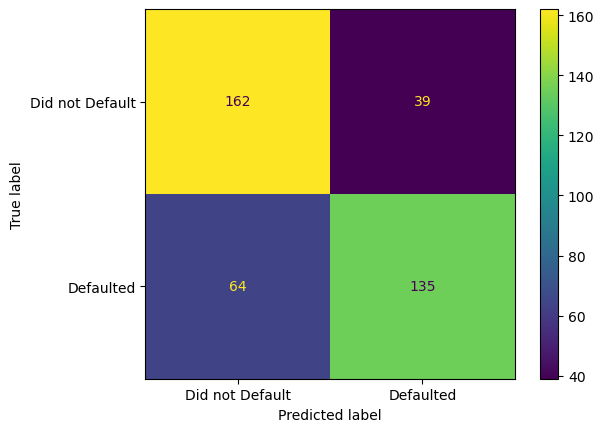

In [43]:
## this check to see how the confusion metrix performs.

y_pred = clf_svm.predict(X_test_scaled)  # Predict the test set results

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Did not Default', 'Defaulted'])

disp.plot(values_format = 'd')
plt.show()


## optimize the Parameters with Cross Validation and GridearchV()

In [44]:
# this are the params for the GridSearchCV to optiomize the SVM

param_grid = [{'C': [0.5, 1, 10, 100],
              'gamma': ['scale', 1, 0.1, 0.01,0.001, 0.0001],
              'kernel': ['rbf']},
             ]


# this optimize the GridSearchCV params
optimal_param = GridSearchCV(SVC(random_state = 42),
                              param_grid,
                              cv = 5,
                              scoring = 'accuracy',
                              verbose = 0
                             
)

# this fit and print the best params
optimal_param.fit(X_train_scaled, y_train)
print(optimal_param.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Building, Evaluating, Drawing, and Interpreting The Final Support Vector machine

##

In [45]:
# This build and Evaluate the Final Support Vector Machine

clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001) # This creates the shell
clf_svm.fit(X_train_scaled, y_train) # This train the SVM

SVC(C=100, gamma=0.001, random_state=42)

### Do not know why Optimizing the GridSeach does not work

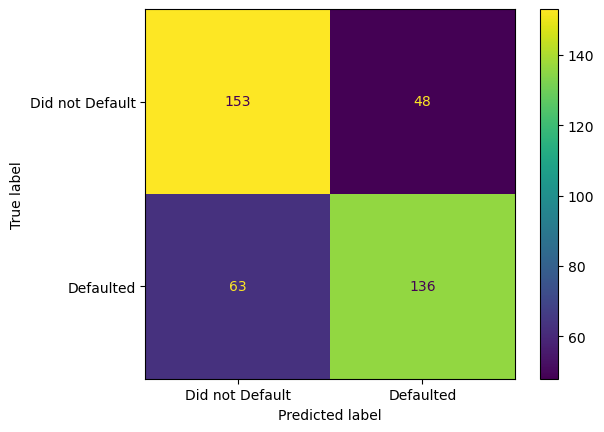

In [46]:
## This is the new confusion metrix performance.However, it does not make it better.

y_pred = clf_svm.predict(X_test_scaled)  # Predict the test set results

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not Default', 'Defaulted'])

disp.plot(values_format='d')
plt.show()


In [47]:
# this check to see how many columns are in the data set

df.shape[1]

24

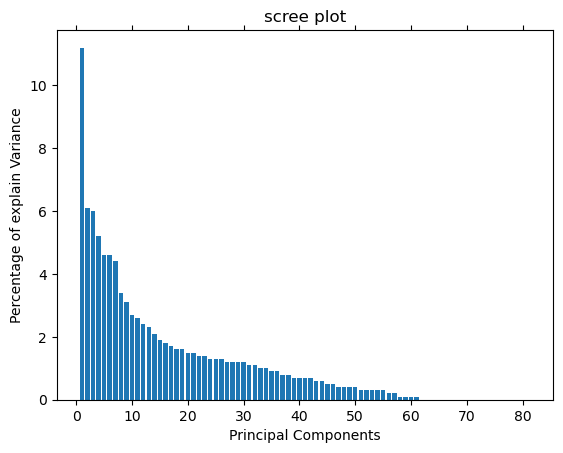

In [48]:
# We use the pricipal Component Analysis (PCA). that will combine all the 
# 24 columns in 2 so that we can draw 2 dimensional graph

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_val = np.round(pca.explained_variance_ratio_ * 100 , 1)
labels = [str(x) for x in range (1, len(per_val ) + 1)]

plt.bar(x = range(1, len(per_val) + 1), height=per_val)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = 'false',
    top = 'false',
    labelbottom = 'false')

plt.ylabel('Percentage of explain Variance')
plt.xlabel('Principal Components')
plt.title('scree plot')
plt.show()

In [49]:
# this retrain and reoptimazing The Support Vector Machine

train_pc1_coord = X_train_pca[:, 0]
train_pc2_coord = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coord, train_pc2_coord)))

params_grid = [
    {'C': [1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV (
            SVC(),
            params_grid,
            cv=5,
            scoring = 'accuracy',
            verbose = 0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


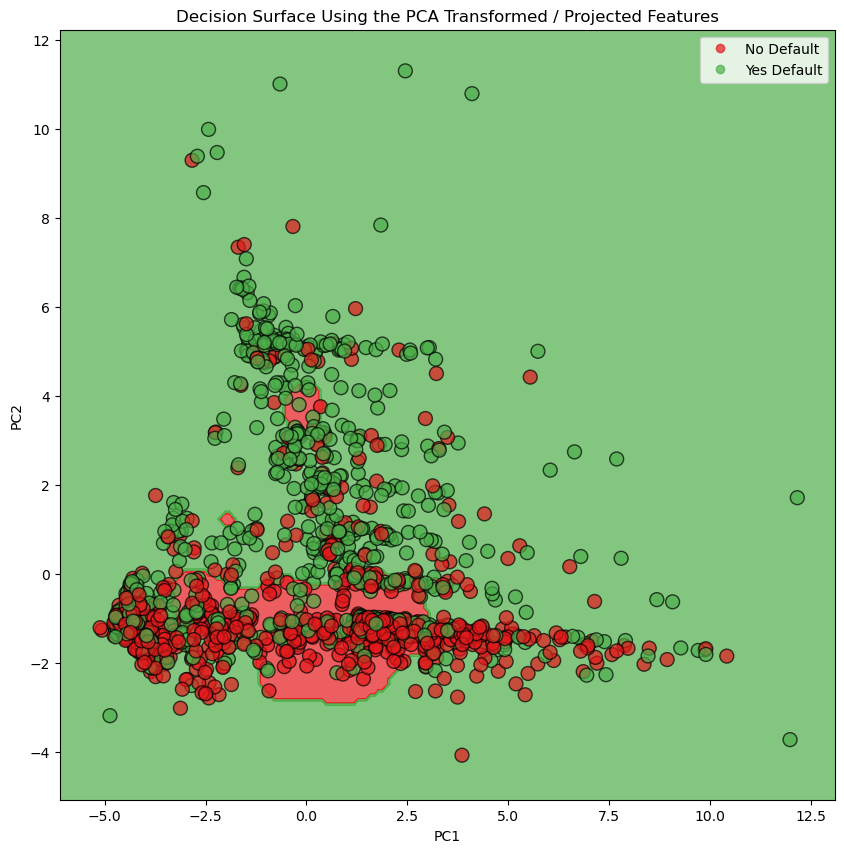

In [50]:
# In here, we draw the decission boundry 

#Initialize and fit the classifier
clf_svm = SVC(random_state=42, C=10, gamma=1)
clf_svm.fit(pca_train_scaled, y_train)

# This transforms the test dataset with the PCA
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

# Define the mesh grid based on the test coordinates
x_min =   test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1
y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1), np.arange(start = y_min, stop=  y_max, step = 0.1))

# Predict on the mesh grid
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
cmap = ListedColormap(['#e41a1c', '#4daf4a'])

# Contour plot
ax.contourf(xx, yy, Z, alpha=0.7, cmap=cmap)

# Scatter plot of the test data
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_train, cmap = cmap, s=100, edgecolor='k', alpha=0.7)

legend = ax.legend(*scatter.legend_elements(), loc="upper right")
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

# Add axis labels and title
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface Using the PCA Transformed / Projected Features')
plt.show()

In [51]:
## This is the end of the project. 